In [ ]:
# !pip install kagglehub
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

# print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

In [34]:
import seaborn as sns

In [2]:
# do wyrzucenia bo wszystkie są unikatowe
#df["ScreenName"].value_counts().sort_values()
#df["UserName"].value_counts().sort_values()

df = df.drop(columns=["ScreenName", "UserName"])

In [3]:
df["Day"] = df["TweetAt"].apply(lambda x: int(x[:2]))
df["Month"] = df["TweetAt"].apply(lambda x: int(x[3:5]))
df = df.drop(columns=["TweetAt"])

In [11]:
df["Country"] = df["Location"].apply(lambda x: map_to_country(x))

In [5]:
country_abbreviations = [
    "AF", "AX", "AL", "DZ", "AS", "AD", "AO", "AI", "AQ", "AG", "AR", "AM", "AW", "AU", "AT", "AZ",
    "BS", "BH", "BD", "BB", "BY", "BE", "BZ", "BJ", "BM", "BT", "BO", "BQ", "BA", "BW", "BV", "BR",
    "IO", "BN", "BG", "BF", "BI", "CV", "KH", "CM", "CA", "KY", "CF", "TD", "CL", "CN", "CX", "CC",
    "CO", "KM", "CD", "CG", "CK", "CR", "CI", "HR", "CU", "CW", "CY", "CZ", "DK", "DJ", "DM", "DO",
    "EC", "EG", "SV", "GQ", "ER", "EE", "SZ", "ET", "FK", "FO", "FJ", "FI", "FR", "GF", "PF", "TF",
    "GA", "GM", "GE", "DE", "GH", "GI", "GR", "GL", "GD", "GP", "GU", "GT", "GG", "GN", "GW", "GY",
    "HT", "HM", "VA", "HN", "HK", "HU", "IS", "IN", "ID", "IR", "IQ", "IE", "IM", "IL", "IT", "JM",
    "JP", "JE", "JO", "KZ", "KE", "KI", "KP", "KR", "KW", "KG", "LA", "LV", "LB", "LS", "LR", "LY",
    "LI", "LT", "LU", "MO", "MG", "MW", "MY", "MV", "ML", "MT", "MH", "MQ", "MR", "MU", "YT", "MX",
    "FM", "MD", "MC", "MN", "ME", "MS", "MA", "MZ", "MM", "NA", "NR", "NP", "NL", "NC", "NZ", "NI",
    "NE", "NG", "NU", "NF", "MP", "NO", "OM", "PK", "PW", "PS", "PA", "PG", "PY", "PE", "PH", "PN",
    "PL", "PT", "PR", "QA", "MK", "RO", "RU", "RW", "RE", "BL", "SH", "KN", "LC", "MF", "PM", "VC",
    "WS", "SM", "ST", "SA", "SN", "RS", "SC", "SL", "SG", "SX", "SK", "SI", "SB", "SO", "ZA", "GS",
    "SS", "ES", "LK", "SD", "SR", "SJ", "SE", "CH", "SY", "TW", "TJ", "TZ", "TH", "TL", "TG", "TK",
    "TO", "TT", "TN", "TR", "TM", "TC", "TV", "UG", "UA", "AE", "GB", "US", "UM", "UY", "UZ", "VU",
    "VE", "VN", "VG", "VI", "WF", "EH", "YE", "ZM", "ZW"
]

In [6]:
countries = [
    "Afghanistan", "Åland Islands", "Albania", "Algeria", "American Samoa", "Andorra", "Angola", "Anguilla", 
    "Antarctica", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", 
    "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", 
    "Bolivia", "Bonaire, Sint Eustatius and Saba", "Bosnia and Herzegovina", "Botswana", "Bouvet Island", "Brazil", 
    "British Indian Ocean Territory", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", 
    "Cambodia", "Cameroon", "Canada", "Cayman Islands", "Central African Republic", "Chad", "Chile", "China", 
    "Christmas Island", "Cocos (Keeling) Islands", "Colombia", "Comoros", "Congo (DRC)", "Congo", "Cook Islands", 
    "Costa Rica", "Côte d'Ivoire", "Croatia", "Cuba", "Curaçao", "Cyprus", "Czechia", "Denmark", "Djibouti", 
    "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", 
    "Eswatini", "Ethiopia", "Falkland Islands", "Faroe Islands", "Fiji", "Finland", "France", "French Guiana", 
    "French Polynesia", "French Southern Territories", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Gibraltar", 
    "Greece", "Greenland", "Grenada", "Guadeloupe", "Guam", "Guatemala", "Guernsey", "Guinea", "Guinea-Bissau", 
    "Guyana", "Haiti", "Heard Island and McDonald Islands", "Vatican City", "Honduras", "Hong Kong", "Hungary", 
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", "Japan", 
    "Jersey", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea (North)", "Korea (South)", "Kuwait", "Kyrgyzstan", 
    "Lao People's Democratic Republic", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Macao", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", 
    "Marshall Islands", "Martinique", "Mauritania", "Mauritius", "Mayotte", "Mexico", "Micronesia", "Moldova", 
    "Monaco", "Mongolia", "Montenegro", "Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", 
    "Nepal", "Netherlands", "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "Niue", "Norfolk Island", 
    "Northern Mariana Islands", "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", 
    "Paraguay", "Peru", "Philippines", "Pitcairn", "Poland", "Portugal", "Puerto Rico", "Qatar", "North Macedonia", 
    "Romania", "Russia", "Rwanda", "Réunion", "Saint Barthélemy", "Saint Helena", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Martin (French part)", "Saint Pierre and Miquelon", "Saint Vincent and the Grenadines", 
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", 
    "Singapore", "Sint Maarten (Dutch part)", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", 
    "South Georgia and the South Sandwich Islands", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", 
    "Svalbard and Jan Mayen", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", 
    "Timor-Leste", "Togo", "Tokelau", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", 
    "Turks and Caicos Islands", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", 
    "United States", "United States Minor Outlying Islands", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", 
    "Vietnam", "Virgin Islands (British)", "Virgin Islands (U.S.)", "Wallis and Futuna", "Western Sahara", "Yemen", 
    "Zambia", "Zimbabwe", "England", "Scotland", "Wales", "Northern Ireland"
]


In [7]:
capitals = [
    "Kabul", "Mariehamn", "Tirana", "Algiers", "Pago Pago", "Andorra la Vella", "Luanda", "The Valley", "", "Saint John's",
    "Buenos Aires", "Yerevan", "Oranjestad", "Canberra", "Vienna", "Baku", "Nassau", "Manama", "Dhaka", "Bridgetown",
    "Minsk", "Brussels", "Belmopan", "Porto-Novo", "Hamilton", "Thimphu", "Sucre", "Kralendijk", "Sarajevo", "Gaborone", "",
    "Brasília", "Diego Garcia", "Bandar Seri Begawan", "Sofia", "Ouagadougou", "Gitega", "Praia", "Phnom Penh", "Yaoundé",
    "Ottawa", "George Town", "Bangui", "N'Djamena", "Santiago", "Beijing", "Flying Fish Cove", "West Island", "Bogotá",
    "Moroni", "Kinshasa", "Brazzaville", "Avarua", "San José", "Yamoussoukro", "Zagreb", "Havana", "Willemstad", "Nicosia",
    "Prague", "Copenhagen", "Djibouti", "Roseau", "Santo Domingo", "Quito", "Cairo", "San Salvador", "Malabo", "Asmara",
    "Tallinn", "Mbabane", "Addis Ababa", "Stanley", "Tórshavn", "Suva", "Helsinki", "Paris", "Cayenne", "Papeetē",
    "Port-aux-Français", "Libreville", "Banjul", "Tbilisi", "Berlin", "Accra", "Gibraltar", "Athens", "Nuuk", "St. George's",
    "Basse-Terre", "Hagåtña", "Guatemala City", "St. Peter Port", "Conakry", "Bissau", "Georgetown", "Port-au-Prince", "",
    "Vatican City", "Tegucigalpa", "Hong Kong", "Budapest", "Reykjavik", "New Delhi", "Jakarta", "Tehran", "Baghdad",
    "Dublin", "Douglas", "Jerusalem", "Rome", "Kingston", "Tokyo", "Saint Helier", "Amman", "Nur-Sultan", "Nairobi",
    "South Tarawa", "Pyongyang", "Seoul", "Kuwait City", "Bishkek", "Vientiane", "Riga", "Beirut", "Maseru", "Monrovia",
    "Tripoli", "Vaduz", "Vilnius", "Luxembourg", "Macao", "Antananarivo", "Lilongwe", "Kuala Lumpur", "Malé", "Bamako",
    "Valletta", "Majuro", "Fort-de-France", "Nouakchott", "Port Louis", "Mamoudzou", "Mexico City", "Palikir", "Chișinău",
    "Monaco", "Ulaanbaatar", "Podgorica", "Plymouth", "Rabat", "Maputo", "Naypyidaw", "Windhoek", "Yaren", "Kathmandu",
    "Amsterdam", "Nouméa", "Wellington", "Managua", "Niamey", "Abuja", "Alofi", "Kingston", "Saipan", "Oslo", "Muscat",
    "Islamabad", "Ngerulmud", "Ramallah", "Panama City", "Port Moresby", "Asunción", "Lima", "Manila", "Adamstown",
    "Warsaw", "Lisbon", "San Juan", "Doha", "Skopje", "Bucharest", "Moscow", "Kigali", "Saint-Denis", "Gustavia",
    "Jamestown", "Basseterre", "Castries", "Marigot", "Saint-Pierre", "Kingstown", "Apia", "San Marino", "São Tomé",
    "Riyadh", "Dakar", "Belgrade", "Victoria", "Freetown", "Singapore", "Philipsburg", "Bratislava", "Ljubljana",
    "Honiara", "Mogadishu", "Pretoria", "King Edward Point", "Juba", "Madrid", "Colombo", "Khartoum", "Paramaribo",
    "Longyearbyen", "Stockholm", "Bern", "Damascus", "Taipei", "Dushanbe", "Dodoma", "Bangkok", "Dili", "Lomé", "Fakaofo",
    "Nukuʻalofa", "Port of Spain", "Tunis", "Ankara", "Ashgabat", "Cockburn Town", "Funafuti", "Kampala", "Kyiv",
    "Abu Dhabi", "London", "Washington, D.C.", "", "Montevideo", "Tashkent", "Port Vila", "Caracas", "Hanoi", "Road Town",
    "Charlotte Amalie", "Mata-Utu", "El Aaiún", "Sana'a", "Lusaka", "Harare", "London", "Edinburgh", "Cardiff", "Belfast"
]
capitals_to_country = dict(zip(capitals, countries))


In [8]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", 
    "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", 
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", 
    "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [9]:
us_state_abbreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

In [10]:
def map_to_country(x):
    x = str(x)
    
    if "USA" in x:
        return "United States"
    if "United States" in x:
        return "United States"
    if "UK" in x:
        return "United Kingdom"
    for i in range(len(x)):
        for j in range(i + 1, len(x) + 1):
            substring = x[i:j]
            if substring in us_state_abbreviations:
                if substring == " CA ":
                    print(x)
                return "United States"
            if substring in us_states:
                if substring == " CA ":
                    print(x)
                return "United States"
            if substring in capitals:
                if substring == " CA ":
                    print(x)
                return capitals_to_country[substring]
            if substring in countries:
                if substring == " CA ":
                    print(x)
                return substring
            if substring in country_abbreviations:
                if substring == " CA ":
                    print(x)
                return countries[country_abbreviations.index(substring)]
            
        
            
    return None



<Axes: xlabel='Country'>

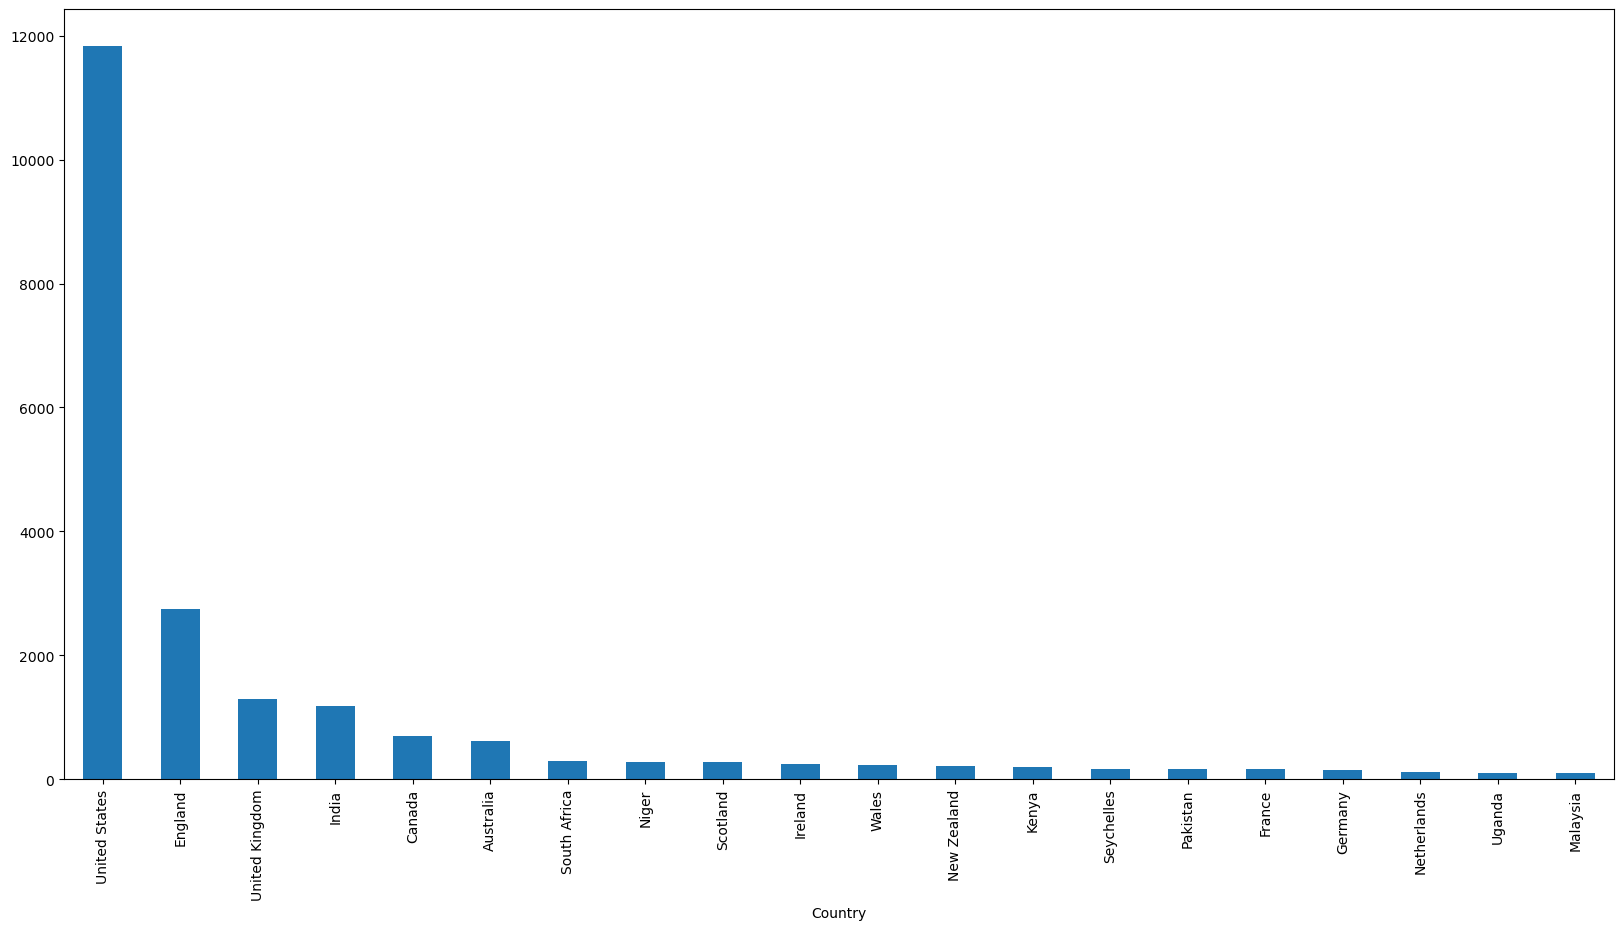

In [12]:
df["Country"].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='Sentiment'>

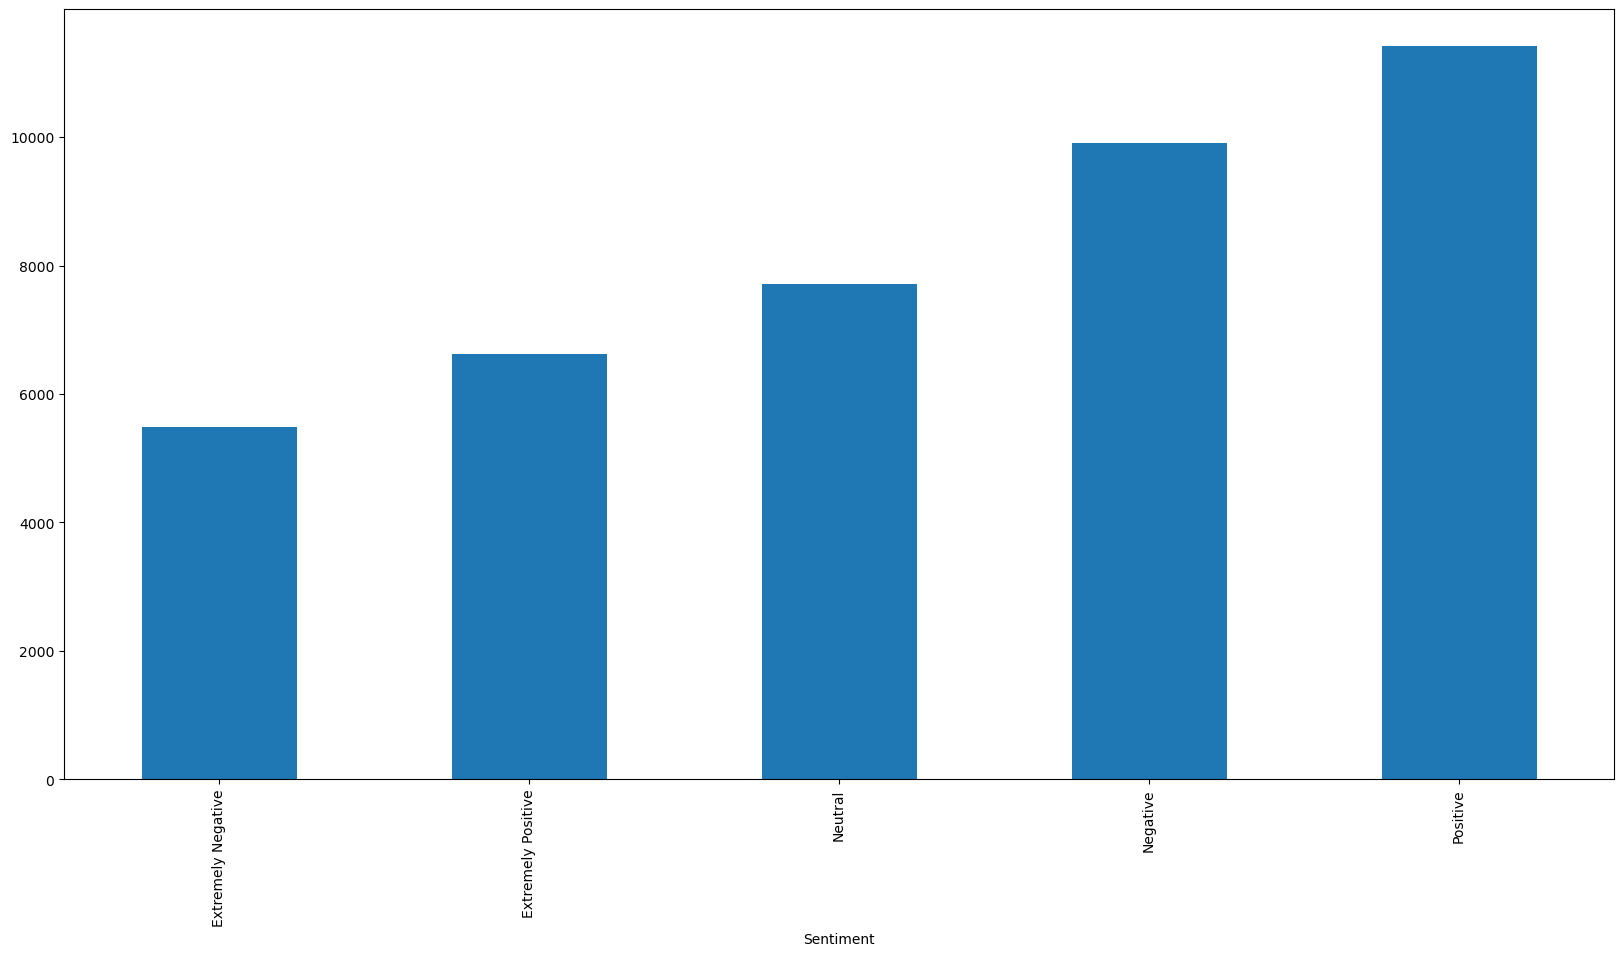

In [ ]:
df["Sentiment"].value_counts().sort_values().plot(kind='bar', figsize=(20, 10))

In [27]:
df["Sentiment"] = df["Sentiment"].map({
    "Neutral": 0,
    "Positive": 1,
    "Negative": -1,
    "Extremely Negative": -2,
    "Extremely Positive": 2
})

In [31]:
df.head()

,Location,OriginalTweet,Sentiment,Day,Month,Country
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,16,3,England
1,UK,advice Talk to your neighbours family to excha...,1,16,3,United Kingdom
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,1,16,3,None
3,NaN,My food stock is not the only one which is emp...,1,16,3,None
4,NaN,"Me, ready to go at supermarket during the #COV...",-2,16,3,None


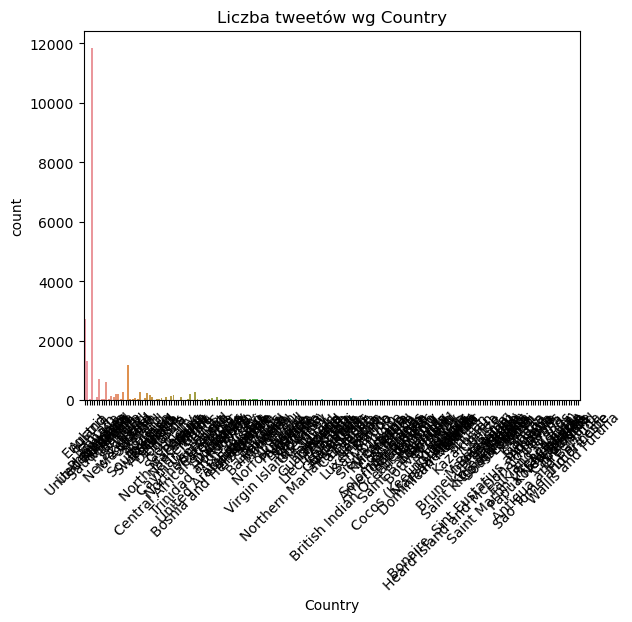

In [36]:
sns.countplot(x="Country", data=df)
plt.title("Liczba tweetów wg Country")
plt.xticks(rotation=45)  # opcjonalnie, jeśli nazwy są długie
plt.show()

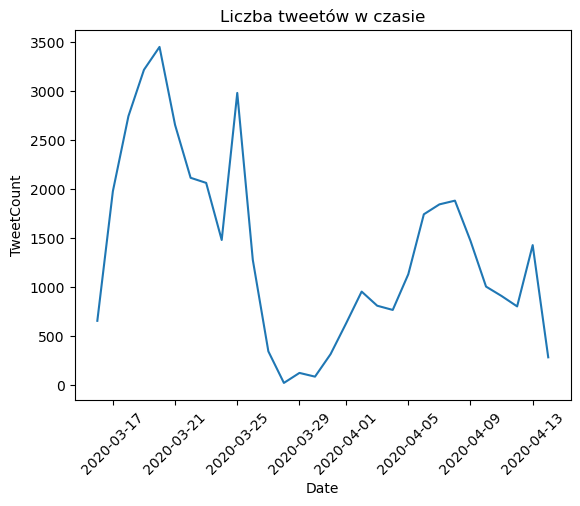

In [38]:
df['Date'] = pd.to_datetime(df['Day'].astype(str) + '-' + df['Month'].astype(str) + '-2020',
                            format='%d-%m-%Y', errors='coerce')

daily_counts = df.groupby('Date').size().reset_index(name='TweetCount')
sns.lineplot(x='Date', y='TweetCount', data=daily_counts)
plt.title('Liczba tweetów w czasie')
plt.xticks(rotation=45)
plt.show()

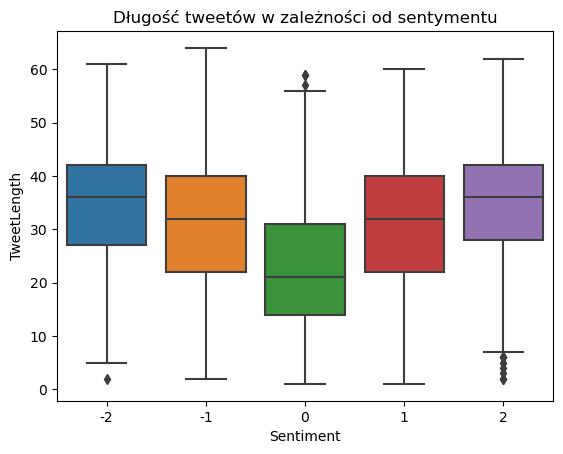

In [42]:
df["TweetLength"] = df["OriginalTweet"].apply(lambda x: len(str(x).split()))

sns.boxplot(x='Sentiment', y='TweetLength', data=df)
plt.title('Długość tweetów w zależności od sentymentu')
plt.show()

Rozkład sentymentu dla NaN w Country:
Sentiment
-2    2482
-1    4396
 0    3217
 1    4773
 2    2766
Name: count, dtype: int64

Rozkład sentymentu dla nie-NaN w Country:
Sentiment
-2    2999
-1    5521
 0    4496
 1    6649
 2    3858
Name: count, dtype: int64


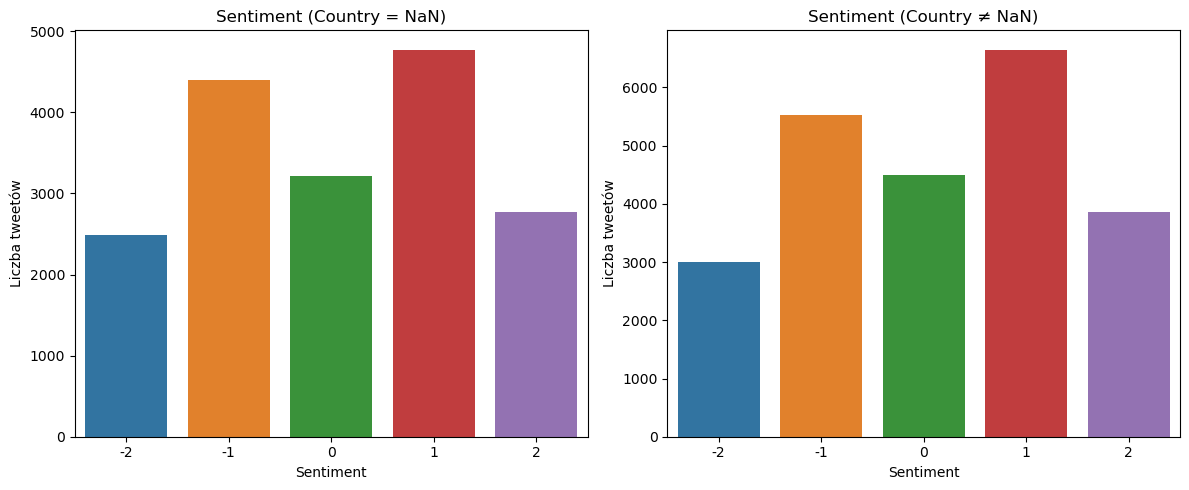

In [43]:
df_nan = df[df["Country"].isna()]
df_not_nan = df[df["Country"].notna()]

# Policzenie rozkładu sentymentu dla obu grup
sentiment_nan = df_nan["Sentiment"].value_counts().sort_index()
sentiment_not_nan = df_not_nan["Sentiment"].value_counts().sort_index()

print("Rozkład sentymentu dla NaN w Country:")
print(sentiment_nan)
print("\nRozkład sentymentu dla nie-NaN w Country:")
print(sentiment_not_nan)

# Wizualizacja – wykresy słupkowe
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=sentiment_nan.index, y=sentiment_nan.values, ax=ax[0])
ax[0].set_title("Sentiment (Country = NaN)")
ax[0].set_xlabel("Sentiment")
ax[0].set_ylabel("Liczba tweetów")

sns.barplot(x=sentiment_not_nan.index, y=sentiment_not_nan.values, ax=ax[1])
ax[1].set_title("Sentiment (Country ≠ NaN)")
ax[1].set_xlabel("Sentiment")
ax[1].set_ylabel("Liczba tweetów")

plt.tight_layout()
plt.show()

Kształt macierzy TF-IDF: (41157, 1000)
Top 20 słów wg średniej wartości TF-IDF:
covid          0.061562
coronavirus    0.057175
prices         0.034287
supermarket    0.032125
store          0.030281
food           0.029506
grocery        0.028875
people         0.023961
consumer       0.023298
amp            0.021862
shopping       0.019662
online         0.018772
pandemic       0.017693
sanitizer      0.015196
need           0.014438
just           0.014112
workers        0.014043
panic          0.013685
like           0.013531
toiletpaper    0.013162
dtype: float64


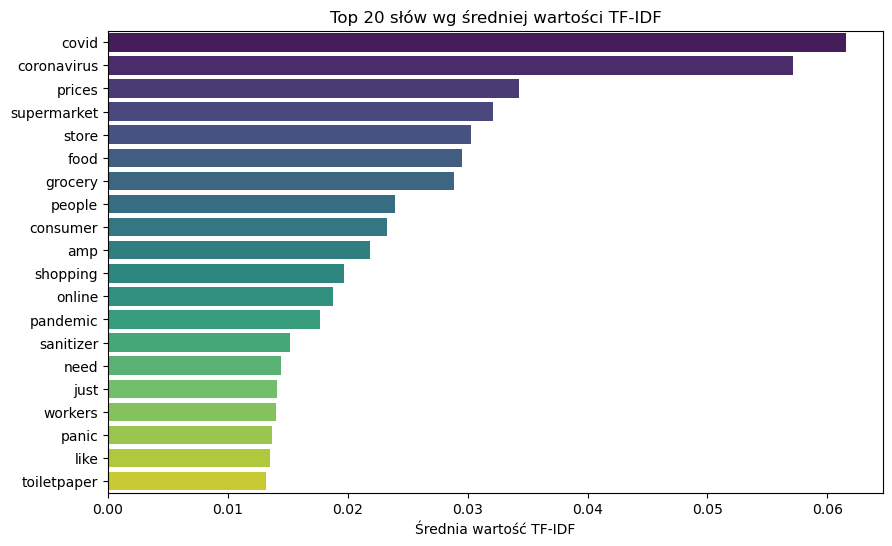

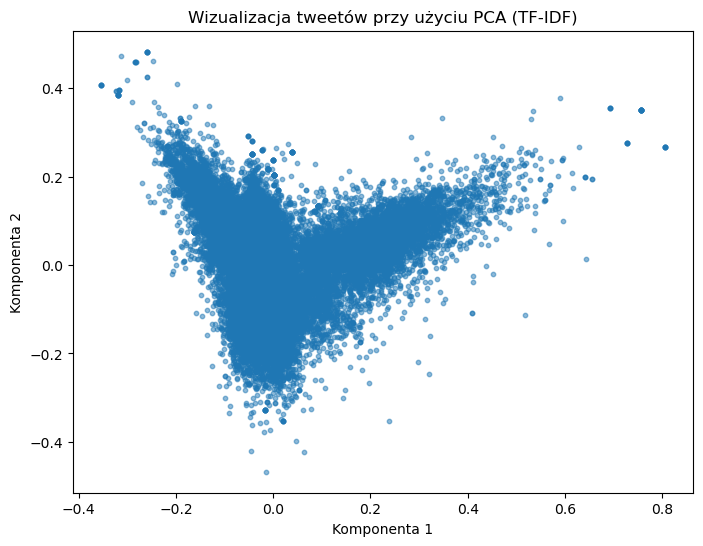

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import re

# Zakładamy, że oryginalny DataFrame to df i zawiera kolumnę "OriginalTweet"

# 1. Tworzymy kopię DataFrame'u, aby nie modyfikować oryginału
df_copy = df.copy()

# 2. Usuwamy wiersze z brakującymi tweetami i upewniamy się, że "OriginalTweet" to typ string
tweets = df_copy["OriginalTweet"].dropna().astype(str)

# 3. Funkcja czyszcząca tekst
def clean_text(text):
    text = text.lower()  # zamiana na małe litery
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # usuwanie linków
    # Pozostawiamy tylko litery (dla polskiego języka uwzględniamy polskie znaki)
    text = re.sub(r"[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()  # usuwamy nadmiarowe spacje
    return text

# 4. Stosujemy czyszczenie tekstu do tweetów
tweets_clean = tweets.apply(clean_text)

# 5. Generujemy macierz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(tweets_clean)
feature_names = vectorizer.get_feature_names_out()

print("Kształt macierzy TF-IDF:", tfidf_matrix.shape)

# 6. Obliczamy średnie wartości TF-IDF dla każdego słowa i wybieramy top 20
avg_tfidf = np.mean(tfidf_matrix.toarray(), axis=0)
tfidf_scores = pd.Series(avg_tfidf, index=feature_names)
top_words = tfidf_scores.sort_values(ascending=False).head(20)

print("Top 20 słów wg średniej wartości TF-IDF:")
print(top_words)

# 7. Wizualizacja: wykres słupkowy top 20 słów
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")
plt.xlabel("Średnia wartość TF-IDF")
plt.title("Top 20 słów wg średniej wartości TF-IDF")
plt.show()

# 8. Opcjonalnie: redukcja wymiarowości przy użyciu PCA i wizualizacja tweetów
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], s=10, alpha=0.5)
plt.title("Wizualizacja tweetów przy użyciu PCA (TF-IDF)")
plt.xlabel("Komponenta 1")
plt.ylabel("Komponenta 2")
plt.show()


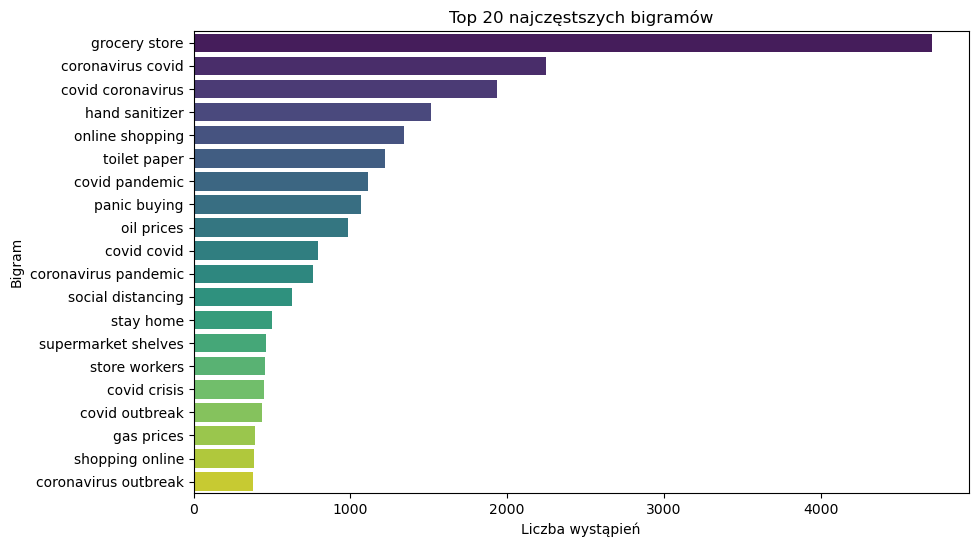

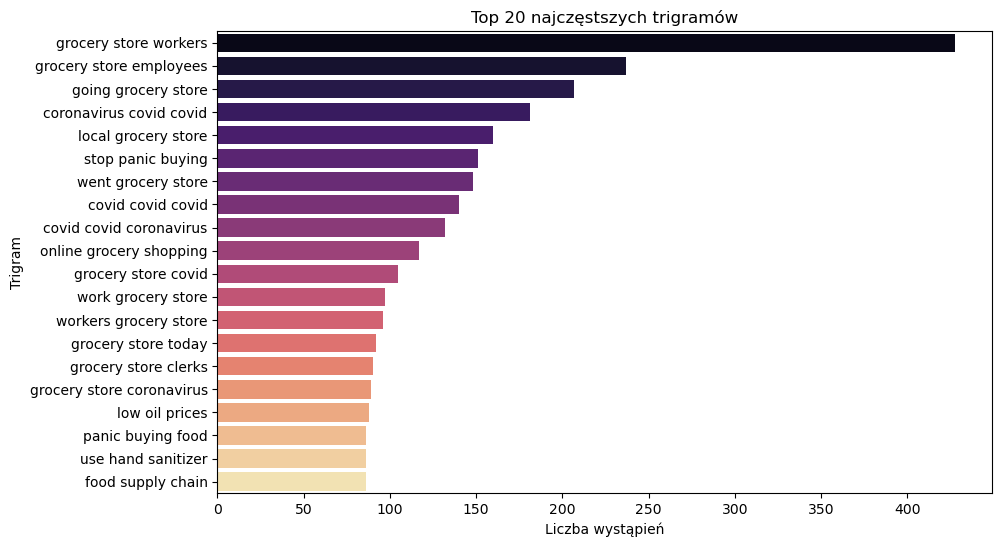

In [98]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Zakładamy, że masz DataFrame 'df' z kolumną 'OriginalTweet'

# 1. Tworzymy kopię DataFrame'u (aby nie modyfikować oryginału)
df_copy = df.copy()

# 2. Usuwamy wiersze z brakami w kolumnie 'OriginalTweet' i konwertujemy na string
tweets = df_copy["OriginalTweet"].dropna().astype(str)

# 3. Funkcja czyszcząca tekst
def clean_text(text):
    text = text.lower()  # na małe litery
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # usuwanie linków
    text = re.sub(r"[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ\s]", "", text)  # tylko litery (dla polskich znaków możesz dostosować)
    text = re.sub(r"\s+", " ", text).strip()  # usuwanie nadmiarowych spacji
    return text

# 4. Czyścimy wszystkie tweety
tweets_clean = tweets.apply(clean_text)

# =============================================================================
#                              BIGRAMY
# =============================================================================

# 5. Tworzymy CountVectorizer dla bigramów
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_bigrams = bigram_vectorizer.fit_transform(tweets_clean)

# 6. Sumujemy wystąpienia każdego bigramu
# X_bigrams jest sparse matrix, więc sumujemy po kolumnach i konwertujemy do tablicy
sum_bigrams = X_bigrams.sum(axis=0).A1  # .A1 zwraca 1D array

# 7. Tworzymy listę (bigram, liczba_wystąpień)
bigram_freq = [(bigram, sum_bigrams[idx]) 
               for bigram, idx in bigram_vectorizer.vocabulary_.items()]

# 8. Sortujemy malejąco wg liczby wystąpień
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# 9. Wybieramy top 20
top_bigrams = bigram_freq[:20]

# 10. Wizualizacja
df_bigrams = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='bigram', data=df_bigrams, palette='viridis')
plt.title('Top 20 najczęstszych bigramów')
plt.xlabel('Liczba wystąpień')
plt.ylabel('Bigram')
plt.show()


# =============================================================================
#                              TRIGRAMY
# =============================================================================

# 11. Analogicznie dla trigramów
trigram_vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english')
X_trigrams = trigram_vectorizer.fit_transform(tweets_clean)

sum_trigrams = X_trigrams.sum(axis=0).A1
trigram_freq = [(trigram, sum_trigrams[idx]) 
                for trigram, idx in trigram_vectorizer.vocabulary_.items()]

trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)
top_trigrams = trigram_freq[:20]

# 12. Wizualizacja trigramów
df_trigrams = pd.DataFrame(top_trigrams, columns=['trigram', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='trigram', data=df_trigrams, palette='magma')
plt.title('Top 20 najczęstszych trigramów')
plt.xlabel('Liczba wystąpień')
plt.ylabel('Trigram')
plt.show()


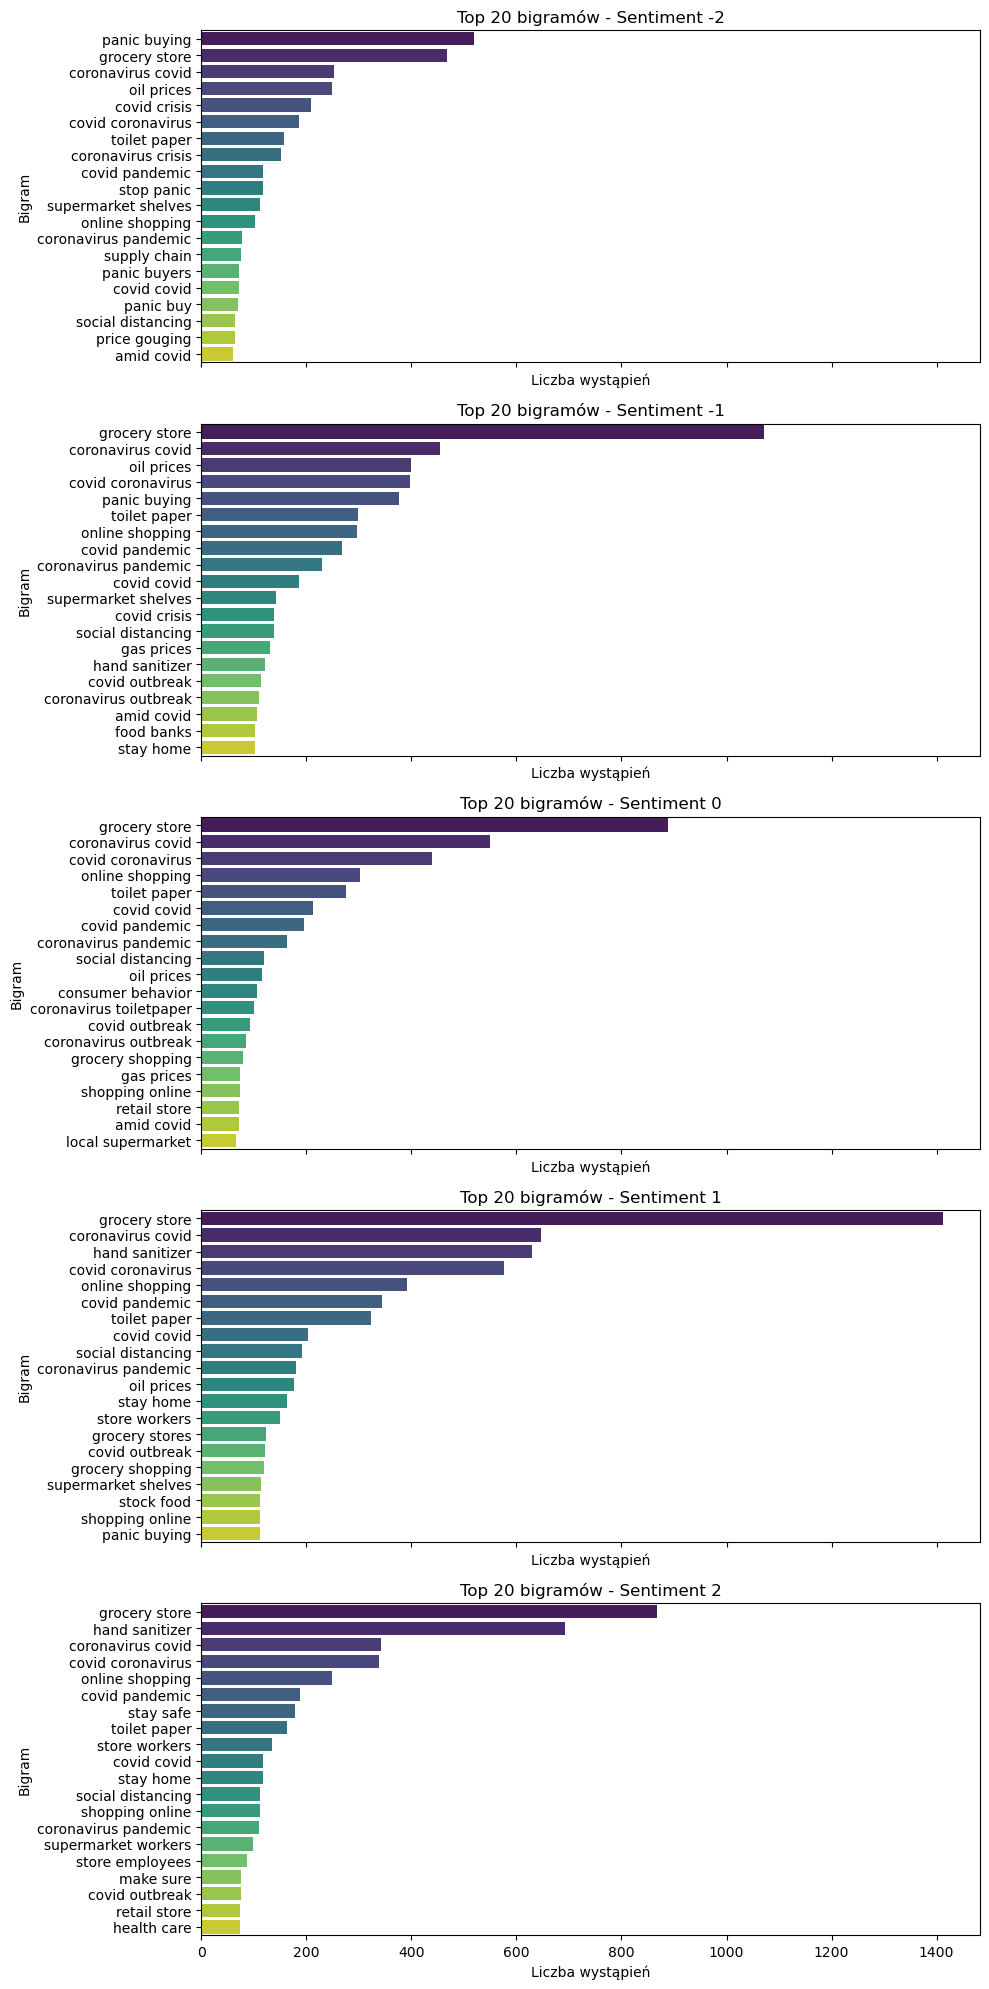

In [101]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Funkcja czyszcząca tekst (podobnie jak wcześniej)
def clean_text(text):
    text = text.lower()  # zamiana na małe litery
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # usuwanie linków
    text = re.sub(r"[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ\s]", "", text)  # tylko litery (uwzględniamy polskie znaki)
    text = re.sub(r"\s+", " ", text).strip()  # usuwanie nadmiarowych spacji
    return text

# Tworzymy kopię oryginalnego DataFrame'u, aby go nie modyfikować
df_copy = df.copy()

# Upewnij się, że kolumna "OriginalTweet" nie zawiera NaN oraz jest typu string
df_copy["OriginalTweet"] = df_copy["OriginalTweet"].dropna().astype(str)

# Ustalamy listę unikalnych kategorii sentymentu, sortując je (np. [-2, -1, 0, 1, 2])
sentiment_categories = sorted(df_copy["Sentiment"].unique())

# Funkcja, która dla danego zestawu tweetów wyciąga top n bigramów
def get_top_bigrams(text_series, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
    X = vectorizer.fit_transform(text_series)
    # Sumujemy wystąpienia każdego bigramu (macierz X jest rzadką macierzą)
    sum_bigrams = X.sum(axis=0).A1  # konwersja do 1D array
    # Tworzymy listę par: (bigram, liczba_wystąpień)
    bigram_freq = [(bigram, sum_bigrams[idx]) 
                   for bigram, idx in vectorizer.vocabulary_.items()]
    # Sortujemy malejąco i wybieramy top n
    bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return pd.DataFrame(bigram_freq, columns=['bigram', 'count'])

# Przygotowujemy wykresy – jeden wykres dla każdej kategorii sentymentu
n_categories = len(sentiment_categories)
fig, axs = plt.subplots(n_categories, 1, figsize=(10, n_categories * 4), sharex=True)

# Jeśli mamy tylko jedną kategorię, upewnij się, że axs jest listą
if n_categories == 1:
    axs = [axs]

for i, sentiment in enumerate(sentiment_categories):
    # Filtrowanie tweetów dla danej kategorii sentymentu i czyszczenie tekstu
    tweets_cat = df_copy[df_copy["Sentiment"] == sentiment]["OriginalTweet"].apply(clean_text)
    
    # Jeżeli dla danej kategorii nie ma tweetów, pomiń tę iterację
    if tweets_cat.empty:
        continue
        
    # Wyciągamy top bigramy
    df_bigrams = get_top_bigrams(tweets_cat, top_n=20)
    
    # Rysujemy wykres słupkowy dla danej kategorii
    sns.barplot(data=df_bigrams, x='count', y='bigram', ax=axs[i], palette="viridis")
    axs[i].set_title(f"Top 20 bigramów - Sentiment {sentiment}")
    axs[i].set_xlabel("Liczba wystąpień")
    axs[i].set_ylabel("Bigram")

plt.tight_layout()
plt.show()


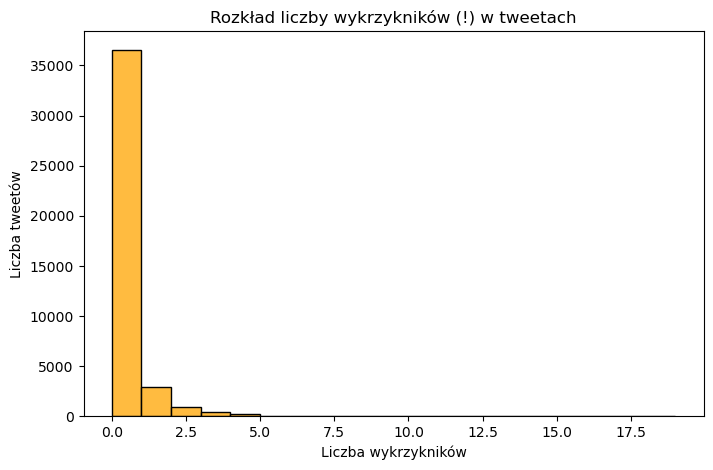

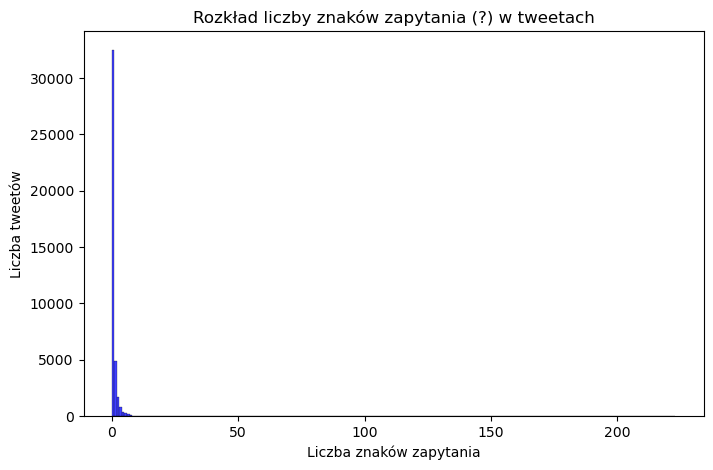

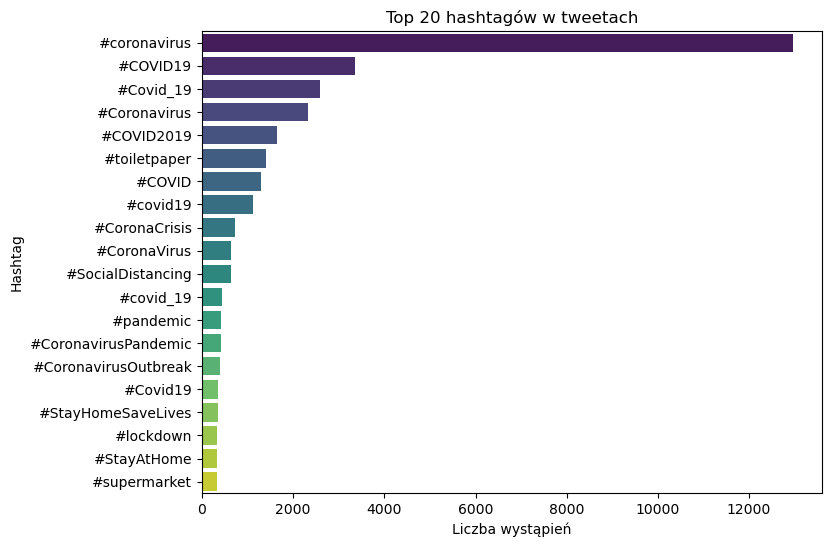

In [103]:
from collections import Counter

df_copy = df.copy()

# 2. Usuwamy wiersze z brakami i konwertujemy tekst na string
df_copy["OriginalTweet"] = df_copy["OriginalTweet"].dropna().astype(str)

# 3. Funkcje do zliczania znaków i wyciągania hashtagów
def count_exclamation_marks(text):
    return text.count("!")

def count_question_marks(text):
    return text.count("?")

def extract_hashtags(text):
    # Znajdujemy wszystkie wyrazy rozpoczynające się od #
    return re.findall(r"#\w+", text)

# 4. Tworzymy nowe kolumny z liczbą ! i ?
df_copy["exclamation_count"] = df_copy["OriginalTweet"].apply(count_exclamation_marks)
df_copy["question_count"] = df_copy["OriginalTweet"].apply(count_question_marks)

# 5. Ekstrahujemy hashtagi ze wszystkich tweetów
df_copy["hashtags"] = df_copy["OriginalTweet"].apply(extract_hashtags)

# ======================================================================
#                           WIZUALIZACJE
# ======================================================================

# A) Rozkład liczby wykrzykników
plt.figure(figsize=(8, 5))
sns.histplot(data=df_copy, x="exclamation_count", bins=range(0, df_copy["exclamation_count"].max()+2), color="orange")
plt.title("Rozkład liczby wykrzykników (!) w tweetach")
plt.xlabel("Liczba wykrzykników")
plt.ylabel("Liczba tweetów")
plt.show()

# B) Rozkład liczby znaków zapytania
plt.figure(figsize=(8, 5))
sns.histplot(data=df_copy, x="question_count", bins=range(0, df_copy["question_count"].max()+2), color="blue")
plt.title("Rozkład liczby znaków zapytania (?) w tweetach")
plt.xlabel("Liczba znaków zapytania")
plt.ylabel("Liczba tweetów")
plt.show()

# C) Top 20 hashtagów w całym zbiorze
# Najpierw zbieramy wszystkie hashtagi do jednej listy
all_hashtags = []
for tags_list in df_copy["hashtags"]:
    all_hashtags.extend(tags_list)

# Zliczamy wystąpienia
hashtag_counter = Counter(all_hashtags)
top_20_hashtags = hashtag_counter.most_common(20)

# Konwersja do DataFrame w celu łatwiejszej wizualizacji
df_top_hashtags = pd.DataFrame(top_20_hashtags, columns=["hashtag", "count"])

plt.figure(figsize=(8, 6))
sns.barplot(x="count", y="hashtag", data=df_top_hashtags, palette="viridis")
plt.title("Top 20 hashtagów w tweetach")
plt.xlabel("Liczba wystąpień")
plt.ylabel("Hashtag")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sentiment", y="exclamation_count", data=df_copy, palette="crimson")
sns.swarmplot(x="Sentiment", y="exclamation_count", data=df_copy, color=".25")
plt.title("Rozkład liczby wykrzykników w tweetach w zależności od sentymentu")
plt.xlabel("Sentiment")
plt.ylabel("Liczba wykrzykników")
plt.show()

# Boxplot dla liczby znaków zapytania w zależności od sentymentu
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sentiment", y="question_count", data=df_copy, palette="crimson")
sns.swarmplot(x="Sentiment", y="question_count", data=df_copy, color=".25")
plt.title("Rozkład liczby znaków zapytania w tweetach w zależności od sentymentu")
plt.xlabel("Sentiment")
plt.ylabel("Liczba znaków zapytania")
plt.show()